In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

main_directory = "Runs"

directories = [
    "straightLine",
    "smallObstacle",
    "oppositeMultipleAgents",
    "oppositeCircleAgents",
    "oppositeAgents",
    "narrowCoridorsOppositeNoNavmeshScenario",
    "narrowCoridorOpposite",
    "cornerSingle",
]

runs = [
    name
    for name in os.listdir(main_directory)
    if os.path.isdir(os.path.join(main_directory, name))
]

print(runs)

runs_dfs = []

In [ ]:
for run in runs:
    scenarios_dfs = []
    for directory in directories:
        path = main_directory + "/" + run + "/" + directory
        # Get list of CSV files in the directory
        csv_files = [
            os.path.join(path, file)
            for file in os.listdir(path)
            if file.endswith(".csv")
        ]
        # Read CSV files into a list of DataFrames
        dfs = [pd.read_csv(file) for file in csv_files]
        # Add agent_id column to each DataFrame based on filename
        for i, df in enumerate(dfs):
            df["agent_id"] = i
            
        
        dfs = pd.concat(dfs, ignore_index=True)
        dfs["run_id"] = run
        dfs["scenario"] = directory
        
        scenarios_dfs.append(dfs)
    scenarios_dfs = pd.concat(scenarios_dfs, ignore_index=True)
    runs_dfs.append(scenarios_dfs)


In [ ]:
# Saves violin plots for each scenario in each run.
os.mkdir(main_directory + "/ScenariosPlots")

for run_df in runs_dfs:
    os.mkdir(main_directory + "/ScenariosPlots/" + run_df['run_id'][0])
    for scenario in directories:
        scenario_df = run_df[run_df["scenario"] == scenario]
        scenario_df = scenario_df.drop(columns=["scenario", "agent_id", "run_id"])
        for column in scenario_df.columns:
            sns.violinplot(data=scenario_df[column])
            plt.title(run_df["run_id"].iloc[0] + " - " + scenario)
            plt.tight_layout()
            plotPath = main_directory + "/ScenariosPlots/" + run_df['run_id'][0] + "/" + scenario + "_" + column + ".png"
            plt.savefig(plotPath)
            plt.close()

In [ ]:
# Saves violin plots for each scenario-column combination. X axis is the run_id
scenarios_data = []
for scenario in directories:
    extracted_data = [df[df["scenario"] == scenario] for df in runs_dfs]
    extracted_data = pd.concat(extracted_data, ignore_index=True)
    scenarios_data.append(extracted_data)


run_ids = scenarios_data[0]['run_id'].unique()


os.mkdir(main_directory + "/ConfigComparePlots")

hue_palette = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", 
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5", 
    "#b5cf6b", "#f7797d"
]

entry_to_color = dict(zip(run_ids, hue_palette))

for scenario in scenarios_data:
    for column in scenario.columns:
        if column == "run_id" or column == "scenario" or column == "agent_id":
            continue
        my_order = scenario.groupby(by=["run_id"])[column].median().sort_values().index
        plt.figure(figsize=(15,8))
        sns.violinplot(x="run_id", y=scenario[column], data=scenario, order=my_order, palette=entry_to_color)
        plt.title(f"{scenario['scenario'][0]} - {column}")
        plt.xticks(rotation=90)
        # plt.show()
        plotPath = main_directory + "/ConfigComparePlots/" + scenario['scenario'][0] + "_" + column + ".png"
        plt.tight_layout()
        plt.savefig(plotPath)
        plt.close()


/var/folders/nz/m8ygqngn1c55lpg6hwz3lb6w0000gn/T/ipykernel_46826/869922475.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="run_id", y=scenario[column], data=scenario, order=my_order, palette=entry_to_color)
/var/folders/nz/m8ygqngn1c55lpg6hwz3lb6w0000gn/T/ipykernel_46826/869922475.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="run_id", y=scenario[column], data=scenario, order=my_order, palette=entry_to_color)
/var/folders/nz/m8ygqngn1c55lpg6hwz3lb6w0000gn/T/ipykernel_46826/869922475.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

KeyError: 0

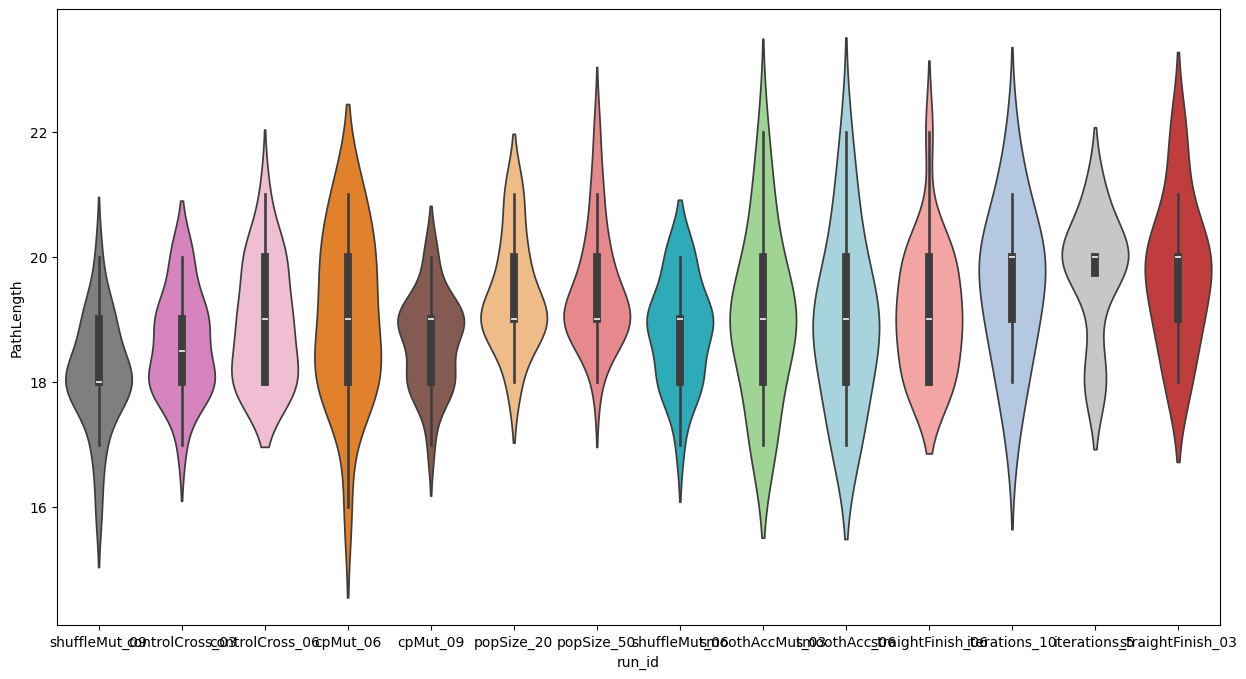

In [345]:
# print(scenarios_data)

dependent_configs = [
    'baseline'
    'C02_E005_J005_T07',
    'C02_E07_J005_T005',
    'C03_E05_J01_T01',
    'C05_E03_J01_T01',
    'C07_E02_J005_T005',
    'C015_E04_J04_T005',
    'C025_E025_J025_T025',
]

non_dependent_configs = [
    'baseline',
    'controlCross_03',
    'controlCross_06',
    'cpMut_06',
    'cpMut_09',
    'iterations_5',
    'iterations_10',
    'popSize_20',
    'popSize_50',
    'shuffleMut_06',
    'shuffleMut_09',
    'smoothAcc_06',
    'smoothAccMut_03',
    'straightFinish_03',
    'straightFinish_06'
]

dependent_df = [scenario_data[scenario_data['run_id'].isin(dependent_configs)] for scenario_data in scenarios_data]

os.mkdir(main_directory + "/DependentComparePlots")

for scenario in dependent_df:
    for column in scenario.columns:
        if column == "run_id" or column == "scenario" or column == "agent_id":
            continue
        my_order = scenario.groupby(by=["run_id"])[column].median().sort_values().index
        plt.figure(figsize=(15,8))
        sns.violinplot(x="run_id", y=scenario[column], data=scenario, order=my_order, palette=entry_to_color)
        plt.title(f"{scenario['scenario'][0]} - {column}")
        plt.xticks(rotation=90)
        # plt.show()
        plotPath = main_directory + "/DependentComparePlots/" + scenario['scenario'][0] + "_" + column + ".png"
        plt.tight_layout()
        plt.savefig(plotPath)
        plt.close()


os.mkdir(main_directory + "/NonDependentComparePlots")
non_dependent_df = [scenario_data[scenario_data['run_id'].isin(non_dependent_configs)] for scenario_data in scenarios_data]

for scenario in non_dependent_df:
    for column in scenario.columns:
        if column == "run_id" or column == "scenario" or column == "agent_id":
            continue
        my_order = scenario.groupby(by=["run_id"])[column].median().sort_values().index
        plt.figure(figsize=(15,8))
        sns.violinplot(x="run_id", y=scenario[column], data=scenario, order=my_order, palette=entry_to_color)
        plt.title(f"{scenario['scenario'][0]} - {column}")
        plt.xticks(rotation=90)
        # plt.show()
        plotPath = main_directory + "/NonDependentComparePlots/" + scenario['scenario'][0] + "_" + column + ".png"
        plt.tight_layout()
        plt.savefig(plotPath)
        plt.close()


